<a href="https://colab.research.google.com/github/abhhinavgupta/machine-learning/blob/main/Regression/Random%20Forest%20Regression/5_random_forest_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree VS Random Forest Regression

## Importing the libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

## Importing the dataset

In [ ]:
home_data = pd.read_csv('train[1].csv')

y = home_data.SalePrice  # Create target object and call it y


In [ ]:
# Create X
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = home_data[features]

In [ ]:
# Split into training (80%) and validation (20%) data
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=1)

## Training the Decision Tree Regression model on the whole dataset

In [ ]:
iowa_model = DecisionTreeRegressor(random_state=1)
# Fit Model
iowa_model.fit(train_X, train_y)

DecisionTreeRegressor(random_state=1)

## Predicting a new result

In [ ]:
val_predictions = iowa_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(val_mae))

Validation MAE when not specifying max_leaf_nodes: 30,643


In [ ]:
# Using best value for max_leaf_nodes
iowa_model = DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)
iowa_model.fit(train_X, train_y)
val_predictions = iowa_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE for best value of max_leaf_nodes: {:,.0f}".format(val_mae))

Validation MAE for best value of max_leaf_nodes: 27,936


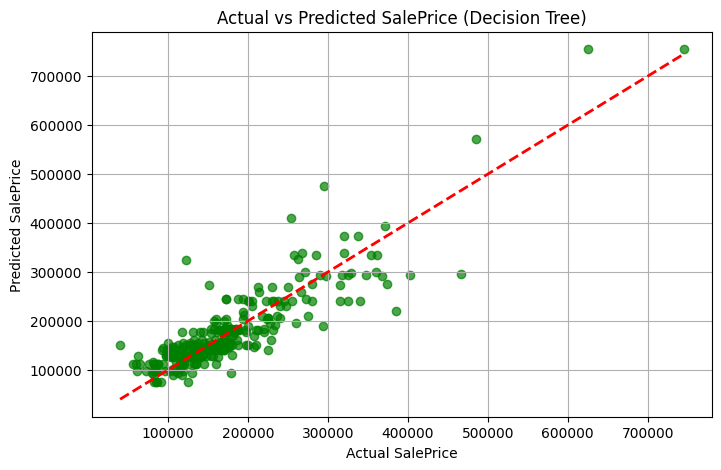

In [25]:


# Plot the results for the test set using Decision Tree

plt.figure(figsize=(8, 5))
plt.scatter(val_y, val_predictions, alpha=0.7, color='green')
plt.plot([val_y.min(), val_y.max()], [val_y.min(), val_y.max()], '--r', linewidth=2)
plt.title('Actual vs Predicted SalePrice (Decision Tree)')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.grid()
plt.show()


In [ ]:


# Calculate R^2 value for Decision Tree
r2_decision_tree = r2_score(val_y, val_predictions)
print("R^2 for Decision Tree: {:.3f}".format(r2_decision_tree))

R^2 for Decision Tree: 0.762


## Training the Random Forest Regression model on the whole dataset

In [21]:

# Define the Random Forest model. Set random_state to 15
rf_model = RandomForestRegressor(random_state=15)

# Fit your Random Forest model
rf_model.fit(train_X, train_y)

RandomForestRegressor(random_state=15)

In [22]:
# Calculate the mean absolute error of your Random Forest model on the validation data
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(val_y, rf_val_predictions)

In [ ]:
print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))

Validation MAE for Random Forest Model: 22,165


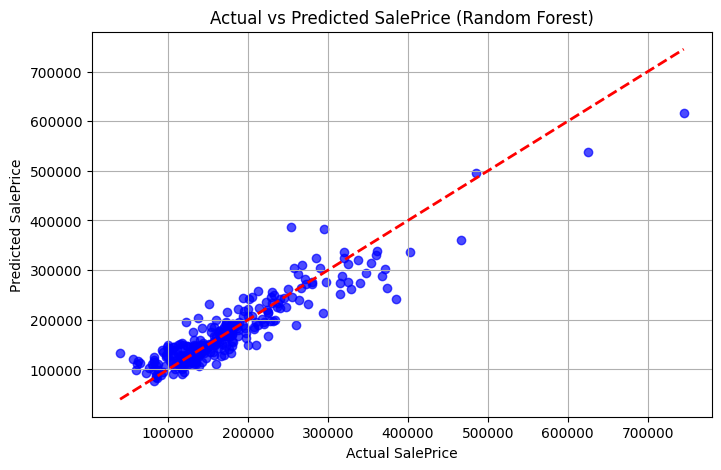

In [24]:

# Plot the results for the test set using Random Forest

plt.figure(figsize=(8, 5))
plt.scatter(val_y, rf_val_predictions, alpha=0.7, color='blue')
plt.plot([val_y.min(), val_y.max()], [val_y.min(), val_y.max()], '--r', linewidth=2)
plt.title('Actual vs Predicted SalePrice (Random Forest)')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.grid()
plt.show()

In [ ]:
# Calculate R^2 value for Random Forest
r2_random_forest = r2_score(val_y, rf_val_predictions)
print("R^2 for Random Forest: {:.3f}".format(r2_random_forest))

R^2 for Random Forest: 0.856
